In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,43.576510,534.209913,1951.728713,88.319152,D,Medium,NaN,0.380264,28.533850,11.096599
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239


In [4]:
df['datetime']=pd.to_datetime(df['datetime'])

In [5]:
df.isnull().sum()

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64

<AxesSubplot:ylabel='Frequency'>

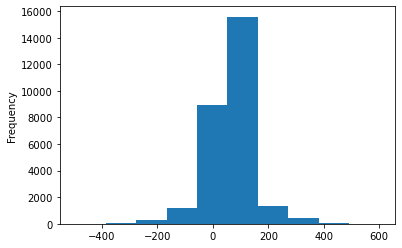

In [6]:
df['wind_speed(m/s)'].plot.hist()

In [7]:
df['wind_speed(m/s)'] = df['wind_speed(m/s)'].replace(-99,0)
df['wind_speed(m/s)'] = df['wind_speed(m/s)'].fillna(0)
df['wind_speed(m/s)'] = df['wind_speed(m/s)'].replace(0,df['wind_speed(m/s)'].mean())

<AxesSubplot:ylabel='Frequency'>

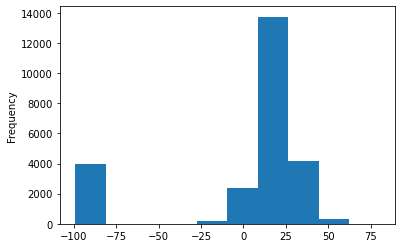

In [8]:
df['atmospheric_temperature(°C)'].plot.hist()

In [9]:
df['atmospheric_temperature(°C)'].values

array([-99.        ,  27.76478479,          nan, ...,  28.6742957 ,
        26.56025356,  18.72123086])

In [10]:
df['atmospheric_temperature(°C)'] = df['atmospheric_temperature(°C)'].replace(-99,0)
df['atmospheric_temperature(°C)'] = df['atmospheric_temperature(°C)'].fillna(0)
df['atmospheric_temperature(°C)'] = df['atmospheric_temperature(°C)'].replace(0,df['atmospheric_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

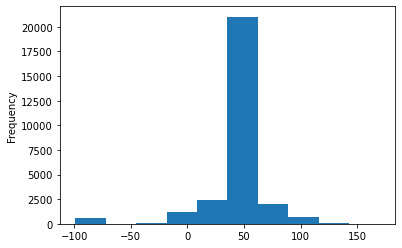

In [11]:
df['shaft_temperature(°C)'].plot.hist()

In [12]:
df['shaft_temperature(°C)'] = df['shaft_temperature(°C)'].replace(-99,0)
df['shaft_temperature(°C)'] = df['shaft_temperature(°C)'].fillna(0)
df['shaft_temperature(°C)'] = df['shaft_temperature(°C)'].replace(0,df['shaft_temperature(°C)'].mean())

<AxesSubplot:ylabel='Frequency'>

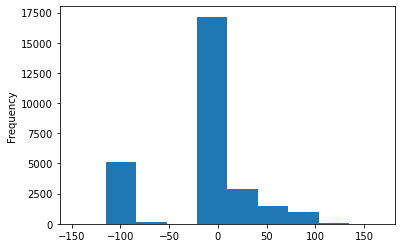

In [13]:
df['blades_angle(°)'].plot.hist()

In [14]:
df['blades_angle(°)'] = df['blades_angle(°)'].replace(-99,0)
df['blades_angle(°)'] = df['blades_angle(°)'].fillna(0)
df['blades_angle(°)'] = df['blades_angle(°)'].replace(0,df['blades_angle(°)'].median())

In [15]:
df['blades_angle(°)'].mean()

8.50320566394154

<AxesSubplot:ylabel='Frequency'>

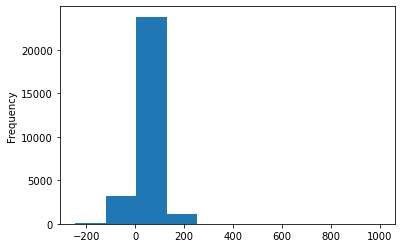

In [16]:
df['gearbox_temperature(°C)'].plot.hist()

In [17]:
df['gearbox_temperature(°C)'] = df['gearbox_temperature(°C)'].replace(-99,0)
df['gearbox_temperature(°C)'] = df['gearbox_temperature(°C)'].fillna(0)
df['gearbox_temperature(°C)'] = df['gearbox_temperature(°C)'].replace(0,df['gearbox_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

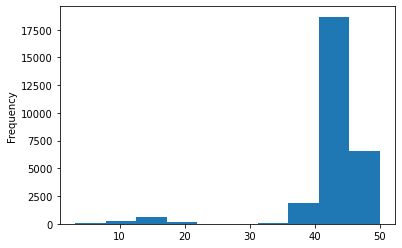

In [18]:
df['engine_temperature(°C)'].plot.hist()

In [19]:
df['engine_temperature(°C)'].mean()

42.614238563101054

In [20]:
df['engine_temperature(°C)'] = df['engine_temperature(°C)'].fillna(0)
df['engine_temperature(°C)'] = df['engine_temperature(°C)'].replace(0,df['engine_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

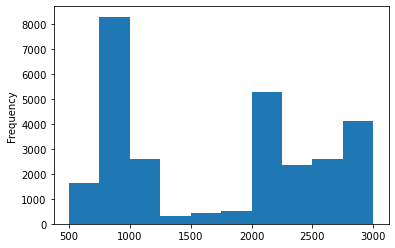

In [21]:
df['motor_torque(N-m)'].plot.hist()

In [22]:
df['motor_torque(N-m)'] = df['motor_torque(N-m)'].fillna(0)
df['motor_torque(N-m)'] = df['motor_torque(N-m)'].replace(0,df['motor_torque(N-m)'].median())

<AxesSubplot:ylabel='Frequency'>

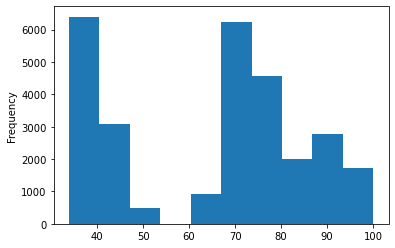

In [23]:
df['generator_temperature(°C)'].plot.hist()

In [24]:
df['generator_temperature(°C)'] = df['generator_temperature(°C)'].fillna(0)
df['generator_temperature(°C)'] = df['generator_temperature(°C)'].replace(0,df['generator_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

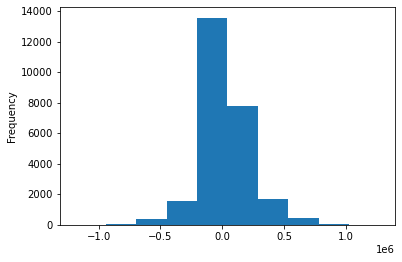

In [25]:
df['atmospheric_pressure(Pascal)'].plot.hist()

In [26]:
df['atmospheric_pressure(Pascal)'] = df['atmospheric_pressure(Pascal)'].fillna(0)
df['atmospheric_pressure(Pascal)'] = df['atmospheric_pressure(Pascal)'].replace(0,df['atmospheric_pressure(Pascal)'].mean())

<AxesSubplot:ylabel='Frequency'>

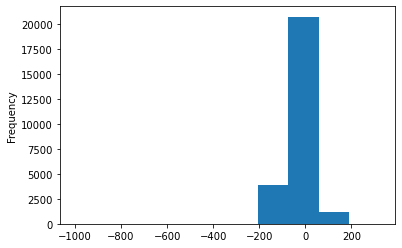

In [27]:
df['windmill_body_temperature(°C)'].plot.hist()

In [28]:
df['windmill_body_temperature(°C)'] = df['windmill_body_temperature(°C)'].replace(-99,0)
df['windmill_body_temperature(°C)'] = df['windmill_body_temperature(°C)'].fillna(0)
df['windmill_body_temperature(°C)'] = df['windmill_body_temperature(°C)'].replace(0,df['windmill_body_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

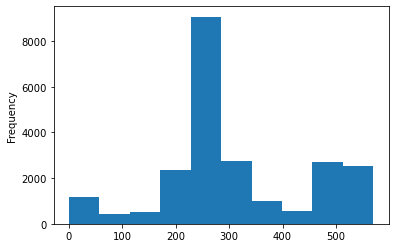

In [29]:
df['wind_direction(°)'].plot.hist()

In [30]:
df['wind_direction(°)'] = df['wind_direction(°)'].fillna(0)
df['wind_direction(°)'] = df['wind_direction(°)'].replace(df['wind_direction(°)'].mean())

<AxesSubplot:ylabel='Frequency'>

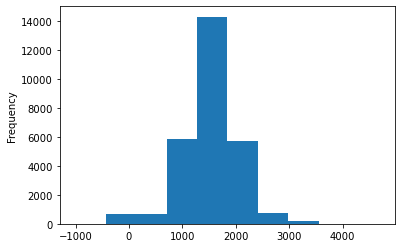

In [31]:
df['resistance(ohm)'].plot.hist()

In [32]:
df['resistance(ohm)'] = df['resistance(ohm)'].replace(-99,0)
df['resistance(ohm)'] = df['resistance(ohm)'].fillna(0)
df['resistance(ohm)'] = df['resistance(ohm)'].replace(0,df['resistance(ohm)'].mean())

<AxesSubplot:ylabel='Frequency'>

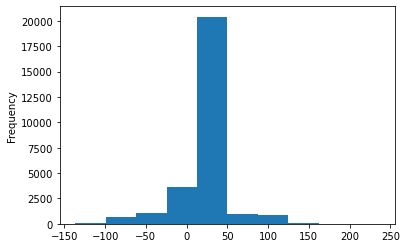

In [33]:
df['rotor_torque(N-m)'].plot.hist()

In [34]:
df['rotor_torque(N-m)'] = df['rotor_torque(N-m)'].replace(-99,0)
df['rotor_torque(N-m)'] = df['rotor_torque(N-m)'].fillna(0)
df['rotor_torque(N-m)'] = df['rotor_torque(N-m)'].replace(0,df['rotor_torque(N-m)'].mean())

In [35]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
df['turbine_status'] = LabelEncoder().fit_transform(df['turbine_status'])
df['cloud_level'] = LabelEncoder().fit_transform(df['cloud_level'])

In [37]:
df['turbine_status'] = df['turbine_status'].fillna(df['turbine_status'].mode())

In [38]:
df['cloud_level'] = df['cloud_level'].fillna(df['cloud_level'].mode())

<AxesSubplot:ylabel='Frequency'>

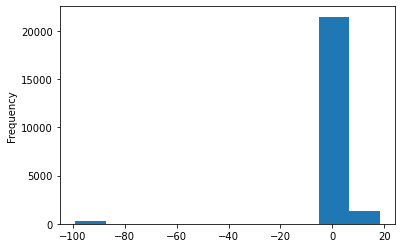

In [39]:
df['blade_length(m)'].plot.hist()

In [40]:
df['blade_length(m)'] = df['blade_length(m)'].replace(-99,0)
df['blade_length(m)'] = df['blade_length(m)'].fillna(0)
df['blade_length(m)'] = df['blade_length(m)'].replace(0,df['blade_length(m)'].median())

<AxesSubplot:ylabel='Frequency'>

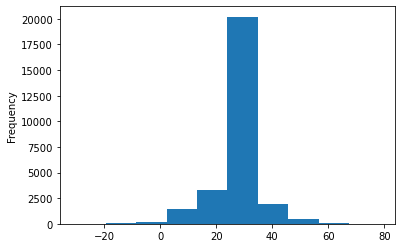

In [41]:
df['windmill_height(m)'].plot.hist()

In [42]:
df['windmill_height(m)'] = df['windmill_height(m)'].fillna(0)
df['windmill_height(m)'] = df['windmill_height(m)'].replace(0,df['windmill_height(m)'].mean())

In [43]:
df.isnull().sum()

tracking_id                         0
datetime                            0
wind_speed(m/s)                     0
atmospheric_temperature(°C)         0
shaft_temperature(°C)               0
blades_angle(°)                     0
gearbox_temperature(°C)             0
engine_temperature(°C)              0
motor_torque(N-m)                   0
generator_temperature(°C)           0
atmospheric_pressure(Pascal)        0
area_temperature(°C)                0
windmill_body_temperature(°C)       0
wind_direction(°)                   0
resistance(ohm)                     0
rotor_torque(N-m)                   0
turbine_status                      0
cloud_level                         0
blade_length(m)                     0
blade_breadth(m)                    0
windmill_height(m)                  0
windmill_generated_power(kW/h)    207
dtype: int64

In [44]:
df=df.dropna()

In [45]:
df['tracking_id'] = df['tracking_id'].str.replace('WM_','')

In [46]:
df['tracking_id']=pd.to_numeric(df['tracking_id'])

In [47]:
df['resistance_gen']=df['resistance(ohm)']*(1+(df['generator_temperature(°C)'].mul(0.0015)))

In [48]:
df['resistance_eng']=df['resistance(ohm)']*(1+(df['engine_temperature(°C)'].mul(0.0015)))

In [49]:
df['motor_torque(N-m)_ln']=np.log(df['motor_torque(N-m)'])

In [50]:
df.datetime = pd.to_datetime(df.datetime, format="%Y-%m-%d")
df["month"] = df.datetime.dt.month
df["week"] = df.datetime.dt.week
df["day"] = df.datetime.dt.day
df["day_of_week"] = df.datetime.dt.dayofweek

In [51]:
df

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),resistance_gen,resistance_eng,motor_torque(N-m)_ln,month,week,day,day_of_week
0,33725,2019-08-04 14:33:20,94.820023,14.150602,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,0.314065,24.281689,6.766521,3044.291792,2904.462165,7.848982,8,31,4,6
1,698,2018-11-05 10:13:20,241.832734,27.764785,42.037969,0.000000,44.104919,46.258870,2372.384119,78.129803,...,0.448494,27.262139,5.966275,1988.838056,1903.732760,7.771651,11,45,5,0
2,39146,2019-09-14 14:03:20,95.484724,14.150602,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,0.302321,27.366127,2.874342,1835.123481,1773.206610,7.412866,9,37,14,5
3,6757,2018-12-25 15:33:20,238.819424,14.150602,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,0.367140,24.287767,14.851089,2245.593716,2103.831631,7.968366,12,52,25,1
4,21521,2019-05-04 03:13:20,10.722890,14.150602,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,0.453374,27.971650,3.519074,1243.615548,1254.295832,6.661465,5,18,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,0.418299,24.590801,9.587934,2250.949101,2125.053558,7.934371,1,1,2,2
28196,32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,0.000000,44.285153,43.487939,2207.882276,72.244645,...,0.461531,26.051604,4.522195,1898.455783,1824.572308,7.699789,7,30,26,4
28197,5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,0.380264,28.533850,11.096599,2229.307386,2080.667618,7.937966,12,50,12,2
28198,12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,0.346447,47.747269,9.373239,2235.148102,2101.292059,7.923220,2,5,3,6


In [52]:
df.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)',
       'windmill_generated_power(kW/h)', 'resistance_gen', 'resistance_eng',
       'motor_torque(N-m)_ln', 'month', 'week', 'day', 'day_of_week'],
      dtype='object')

In [53]:
X = df[['wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)', 'resistance_gen', 'resistance_eng',
       'motor_torque(N-m)_ln', 'month', 'week', 'day', 'day_of_week']]
y = df[['windmill_generated_power(kW/h)']]

In [54]:
# X_scaling = ['wind_speed(m/s)',
#        'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
#        'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
#        'motor_torque(N-m)', 'generator_temperature(°C)',
#        'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
#        'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
#        'rotor_torque(N-m)', 'blade_length(m)',
#        'blade_breadth(m)', 'windmill_height(m)']
# df[X_scaling]=StandardScaler().fit_transform(df[X_scaling])
# X_sc = df[['tracking_id', 'wind_speed(m/s)',
#        'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
#        'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
#        'motor_torque(N-m)', 'generator_temperature(°C)',
#        'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
#        'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
#        'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
#        'blade_breadth(m)', 'windmill_height(m)']]

In [55]:
from catboost import CatBoostRegressor

<AxesSubplot:>

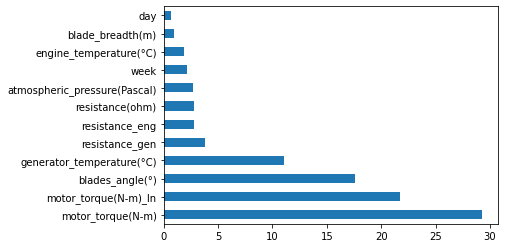

In [68]:
pd.Series(CatBoostRegressor(verbose=False).fit(X,y).feature_importances_,index=X.columns).nlargest(12).plot.barh(12)

In [56]:
from sklearn.ensemble import ExtraTreesRegressor

<AxesSubplot:>

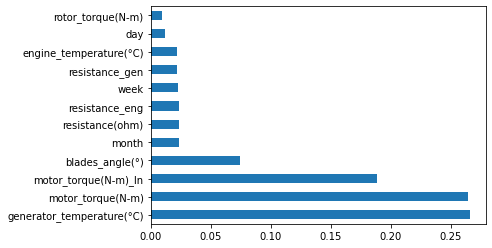

In [70]:
pd.Series(ExtraTreesRegressor().fit(X,y).feature_importances_,index=X.columns).nlargest(12).plot.barh()

In [57]:
from xgboost import XGBRegressor

<AxesSubplot:>

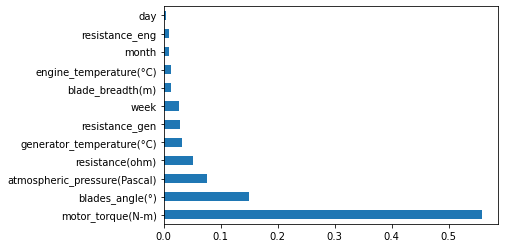

In [72]:
pd.Series(XGBRegressor().fit(X,y).feature_importances_,index=X.columns).nlargest(12).plot.barh()

In [58]:
from lightgbm import LGBMRegressor

<AxesSubplot:>

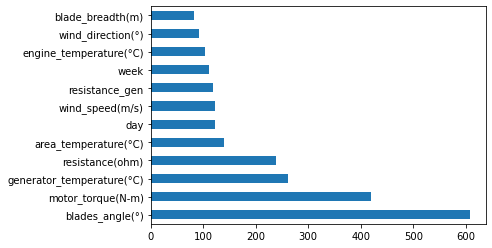

In [74]:
pd.Series(LGBMRegressor().fit(X,y).feature_importances_,index=X.columns).nlargest(12).plot.barh()

In [64]:
# X_bf = df[['blades_angle(°)','resistance(ohm)','atmospheric_pressure(Pascal)',
#            'wind_speed(m/s)','motor_torque(N-m)','generator_temperature(°C)',
#            'engine_temperature(°C)','area_temperature(°C)','gearbox_temperature(°C)',
#            'wind_direction(°)','rotor_torque(N-m)']]

# 'tracking_id', 'wind_speed(m/s)',
#        'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
#        'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
#        'motor_torque(N-m)', 'generator_temperature(°C)',
#        'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
#        'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
#        'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
#        'blade_breadth(m)', 'windmill_height(m)'

In [59]:
# X_bf=df[['motor_torque(N-m)','blades_angle(°)','generator_temperature(°C)','resistance(ohm)',
#         'atmospheric_pressure(Pascal)','engine_temperature(°C)','blade_breadth(m)',
#         'area_temperature(°C)','wind_direction(°)','resistance_gen','resistance_eng',
#         'motor_torque(N-m)_ln','wind_speed(m/s)']]

X_bf=df[['wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)', 'resistance_gen', 'resistance_eng',
       'motor_torque(N-m)_ln', 'month', 'week', 'day', 'day_of_week']]

In [60]:
X_bf.isnull().sum()

wind_speed(m/s)                  0
atmospheric_temperature(°C)      0
shaft_temperature(°C)            0
blades_angle(°)                  0
gearbox_temperature(°C)          0
engine_temperature(°C)           0
motor_torque(N-m)                0
generator_temperature(°C)        0
atmospheric_pressure(Pascal)     0
area_temperature(°C)             0
windmill_body_temperature(°C)    0
wind_direction(°)                0
resistance(ohm)                  0
rotor_torque(N-m)                0
turbine_status                   0
cloud_level                      0
blade_length(m)                  0
blade_breadth(m)                 0
windmill_height(m)               0
resistance_gen                   0
resistance_eng                   0
motor_torque(N-m)_ln             0
month                            0
week                             0
day                              0
day_of_week                      0
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import *

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X_bf,y,test_size=0.1,random_state=1)

In [64]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)

In [80]:
cbr=cross_val_score(CatBoostRegressor(verbose=False),X_bf,y,cv=kf,scoring='r2')
print('Accuracy CBR {:.4f}'.format(cbr.mean()))
xgb=cross_val_score(XGBRegressor(),X_bf,y,cv=kf,scoring='r2')
print('Accuracy XGBR {:.4f}'.format(xgb.mean()))
etr=cross_val_score(ExtraTreesRegressor(n_jobs=-1),X_bf,y,cv=kf,scoring='r2')
print('Accuracy ETR {:.4f}'.format(etr.mean()))
lgbmr=cross_val_score(LGBMRegressor(),X_bf,y,cv=kf,scoring='r2')
print('Accuracy LGBMR {:.4f}'.format(lgbmr.mean()))

Accuracy CBR 0.9650
Accuracy XGBR 0.9622
Accuracy ETR 0.9632
Accuracy LGBMR 0.9615


In [67]:
from sklearn.linear_model import *

In [69]:
rfr_model=LinearRegression()
rfr_1=rfr_model.fit(X_train,y_train)
y_train_pred=rfr_1.predict(X_train)
y_test_pred=rfr_1.predict(X_test)
print('Accuracy train {:.4f}'.format(r2_score(y_train,y_train_pred)))
print('Accuracy test {:.4f}'.format(r2_score(y_test,y_test_pred)))
print('Difference {:.4f}'.format(r2_score(y_train,y_train_pred)-r2_score(y_test,y_test_pred)))

Accuracy train 0.4977
Accuracy test 0.4822
Difference 0.0156


In [81]:
cbr_model=CatBoostRegressor(verbose=False,iterations=5000,learning_rate=0.1,l2_leaf_reg=0.1,depth=6,leaf_estimation_method='Gradient')
cbr_1=cbr_model.fit(X_train,y_train)
y_train_pred=cbr_1.predict(X_train)
y_test_pred=cbr_1.predict(X_test)
print('Accuracy train {:.4f}'.format(r2_score(y_train,y_train_pred)))
print('Accuracy test {:.4f}'.format(r2_score(y_test,y_test_pred)))
print('Difference {:.4f}'.format(r2_score(y_train,y_train_pred)-r2_score(y_test,y_test_pred)))

Accuracy train 0.9985
Accuracy test 0.9652
Difference 0.0332


In [82]:
# for estimator in (x*0.1 for x in range(1,100)):
#     model=CatBoostRegressor(verbose=False,iterations=5000,learning_rate=estimator).fit(X_train,y_train)
#     r2_train=model.predict(X_train)
#     r2_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 r2_score(y_train,r2_train),
#                                                                                                 r2_score(y_test,r2_test),
#                                                                                                 r2_score(y_train,r2_train)-r2_score(y_test,r2_test)))

In [83]:
xgb_model=XGBRegressor(n_estimators=750,eta=0.1,max_depth=6,min_child_weight=1,reg_lambda=3)
xgb_1=xgb_model.fit(X_train,y_train)
print('Accuracy train {:.4f}'.format(xgb_1.score(X_train,y_train)))
print('Accuracy test {:.4f}'.format(xgb_1.score(X_test,y_test)))
print('Difference {:.4f}'.format(xgb_1.score(X_train,y_train)-xgb_1.score(X_test,y_test)))

Accuracy train 0.9943
Accuracy test 0.9654
Difference 0.0289


In [84]:
# for estimator in (x*100 for x in range(10,30)):
#     model=XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
#     r2_train=model.predict(X_train)
#     r2_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 r2_score(y_train,r2_train),
#                                                                                                 r2_score(y_test,r2_test),
#                                                                                                 r2_score(y_train,r2_train)-r2_score(y_test,r2_test)))

In [85]:
etc_model=ExtraTreesRegressor(n_jobs=-1,n_estimators=100,max_depth=27,max_samples=3,random_state=1)
etc_1=etc_model.fit(X_train,y_train)
print('Accuracy train {:.4f}'.format(etc_1.score(X_train,y_train)))
print('Accuracy test {:.4f}'.format(etc_1.score(X_test,y_test)))
print('Difference {:.4f}'.format(etc_1.score(X_train,y_train)-etc_1.score(X_test,y_test)))

Accuracy train 1.0000
Accuracy test 0.9605
Difference 0.0395


In [86]:
# for estimator in (x*1 for x in range(1,100)):
#     model=ExtraTreesRegressor(n_jobs=-1,n_estimators=100,max_depth=27,max_samples=estimator).fit(X_train,y_train)
#     r2_train=model.predict(X_train)
#     r2_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 r2_score(y_train,r2_train),
#                                                                                                 r2_score(y_test,r2_test),
#                                                                                                 r2_score(y_train,r2_train)-r2_score(y_test,r2_test)))

In [87]:
lgbm_model=LGBMRegressor(num_iterations=1000,num_leaves=19,max_depth=14,learning_rate=0.1,reg_alpha=0.5,reg_lambda=0.7)
lgbm_1=lgbm_model.fit(X_train,y_train)
print('Accuracy train {:.4f}'.format(lgbm_1.score(X_train,y_train)))
print('Accuracy test {:.4f}'.format(lgbm_1.score(X_test,y_test)))
print('Difference {:.4f}'.format(lgbm_1.score(X_train,y_train)-lgbm_1.score(X_test,y_test)))

Accuracy train 0.9909
Accuracy test 0.9654
Difference 0.0255


In [88]:
# for estimator in (x*0.1 for x in range(1,100)):
#     model=LGBMRegressor(num_iterations=1000,num_leaves=19,max_depth=14,learning_rate=0.1,reg_alpha=0.5,reg_lambda=estimator).fit(X_train,y_train)
#     r2_train=model.predict(X_train)
#     r2_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 r2_score(y_train,r2_train),
#                                                                                                 r2_score(y_test,r2_test),
#                                                                                                 r2_score(y_train,r2_train)-r2_score(y_test,r2_test)))

In [89]:
from sklearn.ensemble import StackingRegressor

In [90]:
est = [('cbr',cbr_model),('xgb',xgb_model),('etc',etc_model),('lgbm',lgbm_model)]

In [91]:
# for estimator in (x*1 for x in range(1,20)):
#     model=StackingRegressor(n_jobs=-1,estimators=est,final_estimator=CatBoostRegressor(verbose=False,iterations=900,depth=8,
#                                                                                        l2_leaf_reg=estimator),
#                             passthrough=True).fit(X_train,y_train)
#     r2_train=model.predict(X_train)
#     r2_test=model.predict(X_test)
#     print('Estimator {}, Accuracy train {:.4f}, Accuracy test {:.4f}, Difference {:.4f}'.format(estimator,
#                                                                                                 r2_score(y_train,r2_train),
#                                                                                                 r2_score(y_test,r2_test),
#                                                                                                 r2_score(y_train,r2_train)-r2_score(y_test,r2_test)))

In [92]:
stacked = StackingRegressor(n_jobs=-1,estimators=est,final_estimator=CatBoostRegressor(verbose=False,iterations=5000,depth=8),
                            passthrough=True)

In [93]:
stacked_1=stacked.fit(X_train,y_train)
y_train_pred=stacked_1.predict(X_train)
y_test_pred=stacked_1.predict(X_test)
print('Accuracy train {:.4f}'.format(r2_score(y_train,y_train_pred)))
print('Accuracy test {:.4f}'.format(r2_score(y_test,y_test_pred)))
print('Difference {:.4f}'.format(r2_score(y_train,y_train_pred)-r2_score(y_test,y_test_pred)))

Accuracy train 0.9962
Accuracy test 0.9685
Difference 0.0277


## TEST

In [94]:
df_test=pd.read_csv('test.csv')

In [95]:
df_test

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,...,28.424722,42.128526,509.795489,1798.141681,-14.365696,NaN,Medium,3.286975,0.407771,20.888674
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,...,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,...,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,...,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364


In [134]:
X_bf_test = df_test[['datetime','wind_speed(m/s)','blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)', 'area_temperature(°C)','atmospheric_pressure(Pascal)','resistance(ohm)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)']]

In [135]:
X_bf_test.isnull().sum()

datetime                            0
wind_speed(m/s)                   126
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
area_temperature(°C)                1
atmospheric_pressure(Pascal)     1151
resistance(ohm)                     0
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64

<AxesSubplot:ylabel='Frequency'>

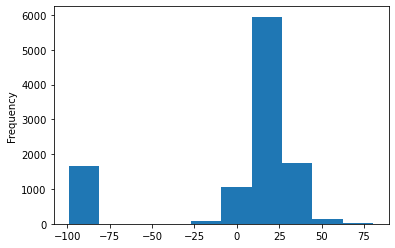

In [136]:
X_bf_test['atmospheric_temperature(°C)'].plot.hist()

In [137]:
X_bf_test['atmospheric_temperature(°C)'] = X_bf_test['atmospheric_temperature(°C)'].replace(-99,0)
X_bf_test['atmospheric_temperature(°C)'] = X_bf_test['atmospheric_temperature(°C)'].fillna(0)
X_bf_test['atmospheric_temperature(°C)'] = X_bf_test['atmospheric_temperature(°C)'].replace(0,X_bf_test['atmospheric_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

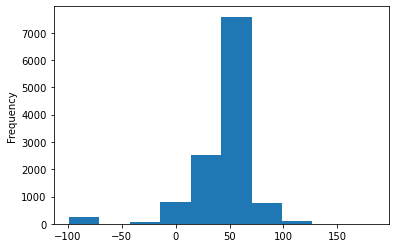

In [138]:
X_bf_test['shaft_temperature(°C)'].plot.hist()

In [139]:
X_bf_test['shaft_temperature(°C)'] = X_bf_test['shaft_temperature(°C)'].replace(-99,0)
X_bf_test['shaft_temperature(°C)'] = X_bf_test['shaft_temperature(°C)'].fillna(0)
X_bf_test['shaft_temperature(°C)'] = X_bf_test['shaft_temperature(°C)'].replace(0,X_bf_test['shaft_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

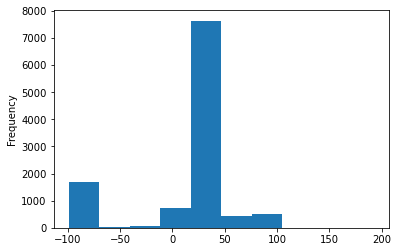

In [140]:
X_bf_test['windmill_body_temperature(°C)'].plot.hist()

In [141]:
X_bf_test['windmill_body_temperature(°C)'] = X_bf_test['windmill_body_temperature(°C)'].replace(-99,0)
X_bf_test['windmill_body_temperature(°C)'] = X_bf_test['windmill_body_temperature(°C)'].fillna(0)
X_bf_test['windmill_body_temperature(°C)'] = X_bf_test['windmill_body_temperature(°C)'].replace(0,X_bf_test['windmill_body_temperature(°C)'].mean())

In [142]:
X_bf_test['turbine_status'] = LabelEncoder().fit_transform(X_bf_test['turbine_status'])
X_bf_test['cloud_level'] = LabelEncoder().fit_transform(X_bf_test['cloud_level'])

In [143]:
X_bf_test['turbine_status'] = X_bf_test['turbine_status'].fillna(X_bf_test['turbine_status'].mode())
X_bf_test['cloud_level'] = X_bf_test['cloud_level'].fillna(X_bf_test['cloud_level'].mode())

<AxesSubplot:ylabel='Frequency'>

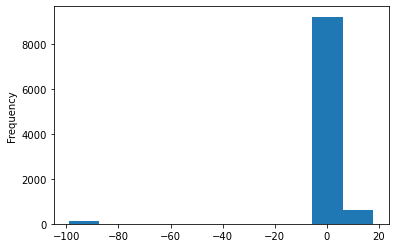

In [144]:
X_bf_test['blade_length(m)'].plot.hist()

In [145]:
X_bf_test['blade_length(m)'] = X_bf_test['blade_length(m)'].replace(-99,0)
X_bf_test['blade_length(m)'] = X_bf_test['blade_length(m)'].fillna(0)
X_bf_test['blade_length(m)'] = X_bf_test['blade_length(m)'].replace(0,X_bf_test['wind_speed(m/s)'].median())

<AxesSubplot:ylabel='Frequency'>

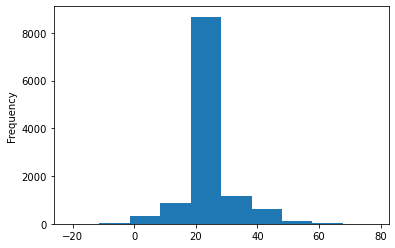

In [146]:
X_bf_test['windmill_height(m)'].plot.hist()

In [147]:
X_bf_test['windmill_height(m)'] = X_bf_test['windmill_height(m)'].fillna(X_bf_test['windmill_height(m)'].mean())

<AxesSubplot:ylabel='Frequency'>

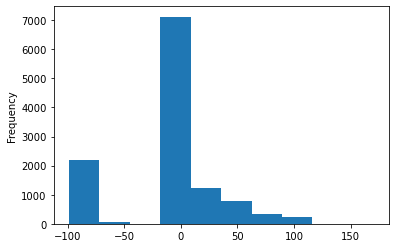

In [148]:
X_bf_test['blades_angle(°)'].plot.hist()

In [149]:
X_bf_test['blades_angle(°)'] = X_bf_test['blades_angle(°)'].replace(-99,0)
X_bf_test['blades_angle(°)'] = X_bf_test['blades_angle(°)'].fillna(0)
X_bf_test['blades_angle(°)'] = X_bf_test['blades_angle(°)'].replace(0,X_bf_test['blades_angle(°)'].median())

<AxesSubplot:ylabel='Frequency'>

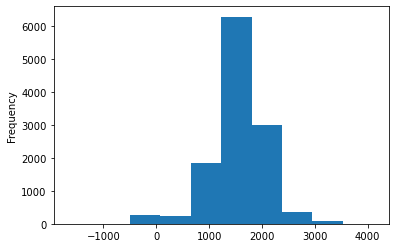

In [150]:
X_bf_test['resistance(ohm)'].plot.hist()

In [151]:
X_bf_test['resistance(ohm)'] = X_bf_test['resistance(ohm)'].replace(-99,0)
X_bf_test['resistance(ohm)'] = X_bf_test['resistance(ohm)'].replace(0,X_bf_test['resistance(ohm)'].mean())

<AxesSubplot:ylabel='Frequency'>

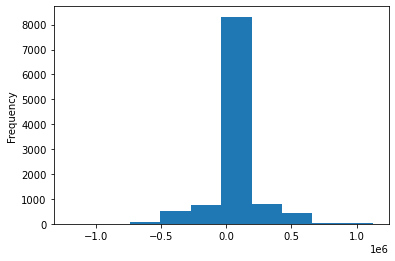

In [152]:
X_bf_test['atmospheric_pressure(Pascal)'].plot.hist()

In [153]:
X_bf_test['atmospheric_pressure(Pascal)'] = X_bf_test['atmospheric_pressure(Pascal)'].fillna(X_bf_test['atmospheric_pressure(Pascal)'].median())

<AxesSubplot:ylabel='Frequency'>

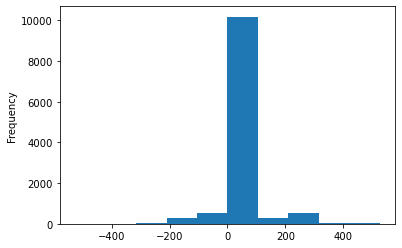

In [154]:
X_bf_test['wind_speed(m/s)'].plot.hist()

In [155]:
X_bf_test['wind_speed(m/s)'] = X_bf_test['wind_speed(m/s)'].replace(-99,0)
X_bf_test['wind_speed(m/s)'] = X_bf_test['wind_speed(m/s)'].fillna(0)
X_bf_test['wind_speed(m/s)'] = X_bf_test['wind_speed(m/s)'].replace(0,X_bf_test['wind_speed(m/s)'].median())

<AxesSubplot:ylabel='Frequency'>

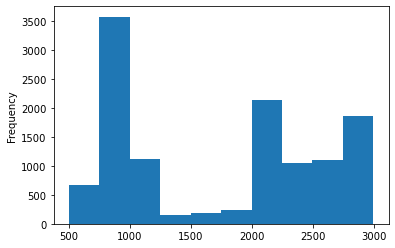

In [156]:
X_bf_test['motor_torque(N-m)'].plot.hist()

In [157]:
X_bf_test['motor_torque(N-m)'] = X_bf_test['motor_torque(N-m)'].fillna(X_bf_test['motor_torque(N-m)'].median())

<AxesSubplot:ylabel='Frequency'>

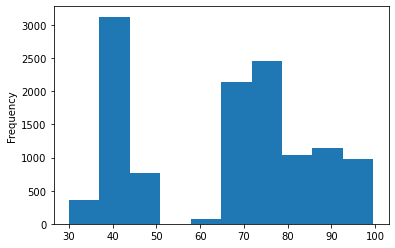

In [158]:
X_bf_test['generator_temperature(°C)'].plot.hist()

In [159]:
X_bf_test['generator_temperature(°C)'] = X_bf_test['generator_temperature(°C)'].fillna(X_bf_test['generator_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

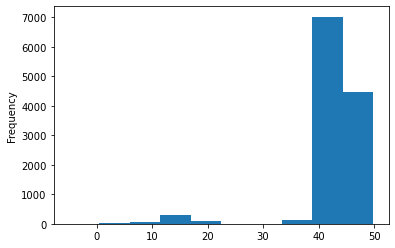

In [160]:
X_bf_test['engine_temperature(°C)'].plot.hist()

In [161]:
X_bf_test['engine_temperature(°C)'] = X_bf_test['engine_temperature(°C)'].fillna(X_bf_test['engine_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

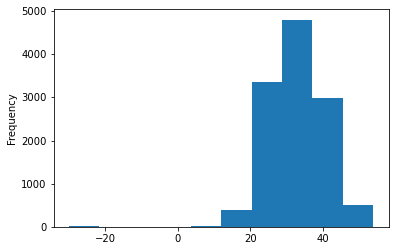

In [162]:
X_bf_test['area_temperature(°C)'].plot.hist()

In [163]:
X_bf_test['area_temperature(°C)'] = X_bf_test['area_temperature(°C)'].fillna(X_bf_test['area_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

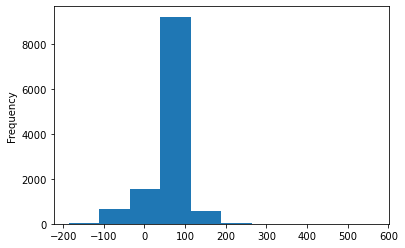

In [164]:
X_bf_test['gearbox_temperature(°C)'].plot.hist()

In [165]:
X_bf_test['gearbox_temperature(°C)'] = X_bf_test['gearbox_temperature(°C)'].replace(-99,0)
X_bf_test['gearbox_temperature(°C)'] = X_bf_test['gearbox_temperature(°C)'].fillna(0)
X_bf_test['gearbox_temperature(°C)'] = X_bf_test['gearbox_temperature(°C)'].replace(0,X_bf_test['gearbox_temperature(°C)'].median())

<AxesSubplot:ylabel='Frequency'>

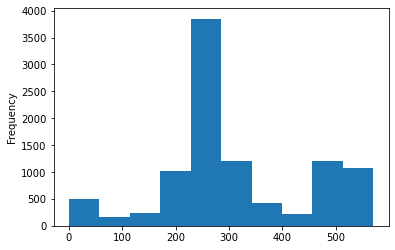

In [166]:
X_bf_test['wind_direction(°)'].plot.hist()

In [167]:
X_bf_test['wind_direction(°)'] = X_bf_test['wind_direction(°)'].fillna(X_bf_test['wind_direction(°)'].mean())

<AxesSubplot:ylabel='Frequency'>

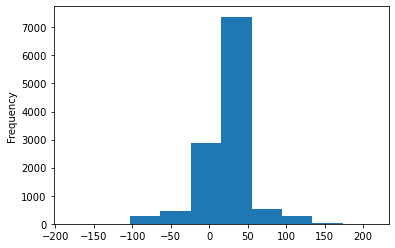

In [168]:
X_bf_test['rotor_torque(N-m)'].plot.hist()

In [169]:
X_bf_test['rotor_torque(N-m)'] = X_bf_test['rotor_torque(N-m)'].replace(-99,0)
X_bf_test['rotor_torque(N-m)'] = X_bf_test['rotor_torque(N-m)'].fillna(0)
X_bf_test['rotor_torque(N-m)'] = X_bf_test['rotor_torque(N-m)'].replace(0,X_bf_test['rotor_torque(N-m)'].mean())

In [170]:
X_bf_test.isnull().any()

datetime                         False
wind_speed(m/s)                  False
blades_angle(°)                  False
gearbox_temperature(°C)          False
engine_temperature(°C)           False
motor_torque(N-m)                False
generator_temperature(°C)        False
area_temperature(°C)             False
atmospheric_pressure(Pascal)     False
resistance(ohm)                  False
atmospheric_temperature(°C)      False
shaft_temperature(°C)            False
windmill_body_temperature(°C)    False
wind_direction(°)                False
rotor_torque(N-m)                False
turbine_status                   False
cloud_level                      False
blade_length(m)                  False
blade_breadth(m)                 False
windmill_height(m)               False
dtype: bool

In [171]:
X_bf_test['resistance_gen']=X_bf_test['resistance(ohm)']*(1+(X_bf_test['generator_temperature(°C)'].mul(0.0015)))
X_bf_test['resistance_eng']=X_bf_test['resistance(ohm)']*(1+(X_bf_test['engine_temperature(°C)'].mul(0.0015)))
X_bf_test['motor_torque(N-m)_ln']=np.log(X_bf_test['motor_torque(N-m)'])

In [172]:
X_bf_test.datetime = pd.to_datetime(X_bf_test.datetime, format="%Y-%m-%d")
X_bf_test["month"] = X_bf_test.datetime.dt.month
X_bf_test["week"] = X_bf_test.datetime.dt.week
X_bf_test["day"] = X_bf_test.datetime.dt.day
X_bf_test["day_of_week"] = X_bf_test.datetime.dt.dayofweek

In [173]:
X_bf_test.columns

Index(['datetime', 'wind_speed(m/s)', 'blades_angle(°)',
       'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'area_temperature(°C)', 'atmospheric_pressure(Pascal)',
       'resistance(ohm)', 'atmospheric_temperature(°C)',
       'shaft_temperature(°C)', 'windmill_body_temperature(°C)',
       'wind_direction(°)', 'rotor_torque(N-m)', 'turbine_status',
       'cloud_level', 'blade_length(m)', 'blade_breadth(m)',
       'windmill_height(m)', 'resistance_gen', 'resistance_eng',
       'motor_torque(N-m)_ln', 'month', 'week', 'day', 'day_of_week'],
      dtype='object')

In [178]:
# X_scaling = ['wind_speed(m/s)',
#        'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
#        'motor_torque(N-m)', 'generator_temperature(°C)', 'area_temperature(°C)','atmospheric_pressure(Pascal)',
#        'wind_direction(°)', 'resistance(ohm)', 'rotor_torque(N-m)']
# X_bf_test[X_scaling]=StandardScaler().fit_transform(X_bf_test[X_scaling])
# X_bf_test = X_bf_test[['motor_torque(N-m)','blades_angle(°)','generator_temperature(°C)','resistance(ohm)',
#         'atmospheric_pressure(Pascal)','engine_temperature(°C)','blade_breadth(m)',
#         'area_temperature(°C)','wind_direction(°)','resistance_gen','resistance_eng','motor_torque(N-m)_ln',
#                       'wind_speed(m/s)']]

X_bf_test = X_bf_test[['wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)', 'resistance_gen', 'resistance_eng',
       'motor_torque(N-m)_ln', 'month', 'week', 'day', 'day_of_week']]

In [179]:
X_bf_test

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,blade_length(m),blade_breadth(m),windmill_height(m),resistance_gen,resistance_eng,motor_torque(N-m)_ln,month,week,day,day_of_week
0,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,...,3.185837,0.403965,25.572431,1831.052051,1763.063664,6.978403,4,16,17,2
1,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,18201.424052,29.431813,...,3.016603,0.444755,24.371823,1230.272331,1237.075473,6.248887,3,13,30,5
2,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,...,2.611941,0.387368,27.654677,1842.858064,1776.388046,7.300281,8,32,10,5
3,24.471997,14.268344,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,18201.424052,23.886434,...,2.866805,0.450478,24.189426,1412.412160,1360.815833,6.788949,6,26,26,2
4,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,...,3.549672,0.368355,4.885440,761.940790,736.974149,7.627504,8,35,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,...,3.286975,0.407771,20.888674,2002.725814,1918.131548,7.793327,2,7,12,1
12082,97.594116,14.268344,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,...,93.338083,0.367823,24.793606,1864.463619,1788.239915,7.642825,11,46,12,0
12083,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,...,3.728375,0.459887,5.653451,2482.047846,2487.894712,6.670370,5,22,27,0
12084,93.254033,14.268344,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,...,2.247676,0.394680,24.591364,1918.689500,1842.158786,7.640054,5,20,13,0


In [180]:
# X_bf_test['tracking_id']=X_bf_test['tracking_id'].str.replace('WM_','')
# X_bf_test['tracking_id']=pd.to_numeric(X_bf_test['tracking_id'])

In [181]:
y_pred=stacked_1.predict(X_bf_test)

In [182]:
y_pred.shape

(12086,)

In [183]:
data=pd.DataFrame(y_pred)

In [184]:
data.to_csv('ss.csv')

In [185]:
dff=pd.read_csv('test.csv')

In [186]:
dff_1=pd.read_csv('ss.csv')

In [187]:
dff.columns

Index(['tracking_id', 'datetime', 'wind_speed(m/s)',
       'atmospheric_temperature(°C)', 'shaft_temperature(°C)',
       'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)',
       'motor_torque(N-m)', 'generator_temperature(°C)',
       'atmospheric_pressure(Pascal)', 'area_temperature(°C)',
       'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
       'rotor_torque(N-m)', 'turbine_status', 'cloud_level', 'blade_length(m)',
       'blade_breadth(m)', 'windmill_height(m)'],
      dtype='object')

In [188]:
dff=dff[['tracking_id', 'datetime']]

In [189]:
dff_1.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [190]:
dff['windmill_generated_power(kW/h)']=dff_1['0']

In [191]:
dff

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.461213
1,WM_18723,2019-03-30 07:43:20,2.325495
2,WM_34552,2019-08-10 11:33:20,3.341214
3,WM_28570,2019-06-26 03:53:20,7.442377
4,WM_36934,2019-08-27 16:43:20,3.420468
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.878808
12082,WM_1630,2018-11-12 17:33:20,3.442076
12083,WM_24703,2019-05-27 11:53:20,5.276644
12084,WM_22893,2019-05-13 21:53:20,5.392163


In [192]:
dff.to_csv('Final.csv',index=False)

In [193]:
dfff=pd.read_csv('Final.csv')

In [194]:
dfff

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.461213
1,WM_18723,2019-03-30 07:43:20,2.325495
2,WM_34552,2019-08-10 11:33:20,3.341214
3,WM_28570,2019-06-26 03:53:20,7.442377
4,WM_36934,2019-08-27 16:43:20,3.420468
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.878808
12082,WM_1630,2018-11-12 17:33:20,3.442076
12083,WM_24703,2019-05-27 11:53:20,5.276644
12084,WM_22893,2019-05-13 21:53:20,5.392163
